# 控制图像的美学样式(aesthetics)

绘制有吸引力的图像很十分重要的。当你在探索一个数据集并为你自己做图的时候，制作一些让人看了心情愉悦的图像是很好的。可视化对向观众传达量化的简介也是很重要的，在这种情况下制作能够抓住查看者的注意力并牢牢吸引住他们的图像就更有必要了。

Matplotlib 是高度可定制的，但是很难知道要如何设置图像才能使得图像更加吸引人。Seaborn 提供了许多定制好的主题和高级的接口，用于控制 Matplotlib 所做图像的外观。

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

让我们定义一个简单的函数来绘制一些偏移正弦波，这将帮助我们看到我们可以调整的能够影响图像风格的不同参数。

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

这是 Matplotlib 默认情况下的绘图外观：

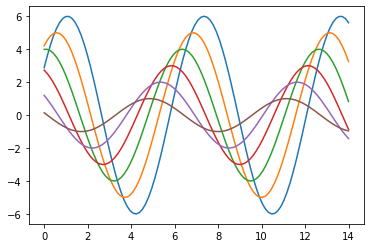

In [3]:
sinplot()

为了将图像的风格转变为 seaborn 的默认样式，我们可以 [`set()`](../generated/seaborn.set.html#seaborn.set "seaborn.set") 函数。

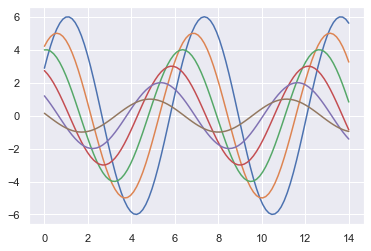

In [4]:
sns.set()
sinplot()

（注意，在 0.8 之前的 seaborn 版本中， [`set()`](../generated/seaborn.set.html#seaborn.set "seaborn.set") 已经在使用 impory 语句导入的时候就被调用了。但在以后的版本中，必须要显式调用它）。

Seaborn 将 matplotlib 参数分成两个独立的组。第一组设置了图像的美术风格，第二组则对图像中不同的元素进行了控制，使得图像可以很容易地融入不同的环境中。

操作这些参数的接口是两对函数。要控制样式，请使用 [`axes_style()`](../generated/seaborn.axes_style.html#seaborn.axes_style "seaborn.axes_style") 和 [`set_style()`](../generated/seaborn.set_style.html#seaborn.set_style "seaborn.set_style") 函数。要对图像中元素的样式进行修改，请使用 [`plotting_context()`](../generated/seaborn.plotting_context.html#seaborn.plotting_context "seaborn.plotting_context") 和 [`set_context()`](../generated/seaborn.set_context.html#seaborn.set_context "seaborn.set_context") 函数。在这两种情况下（控制图像样式与修改元素样式），第一个函数会返回一个参数字典，第二个函数设置 matplotlib 中相关参数的默认值。

## Seaborn 图像参数

有五个预设的 Seaborn 主题： `darkgrid`，`whitegrid`，`dark`，`white`以及 `ticks`。它们分别适用于不同的应用程序和个人偏好。默认主题为 `darkgrid`。如上所述，坐标方格有助于将制出的图像用作定量信息的查阅表，灰色背景上的白色有助于防止网格与表示数据的行发生竞争。 `whitegrid` 主题类似，但它更适用于包含大量数据元素的绘图：

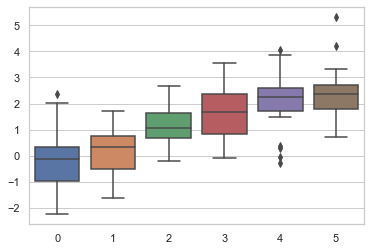

In [5]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

对许多的图像而言，（尤其是在你只是想通过图像来提供给人们一个对数据模式的印象时，比如说作报告时）坐标网格都是不必要的。

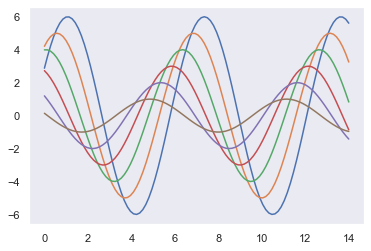

In [6]:
sns.set_style("dark")
sinplot()

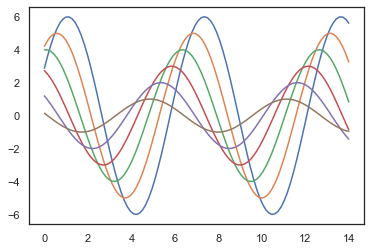

In [7]:
sns.set_style("white")
sinplot()

有时，您可能希望为绘图提供一点额外的结构，这正是 tick 样式的用武之地：

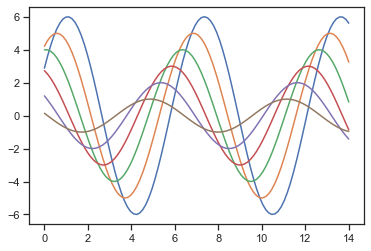

In [8]:
sns.set_style("ticks")
sinplot()

## 移除坐标轴

 `white` 样式与 `ticks` 样式的好处是都能删除所不需要的顶部与右部坐标轴。使用 seaborn 中的函数 [`despine()`](../generated/seaborn.despine.html#seaborn.despine "seaborn.despine") 可以来移除它们：

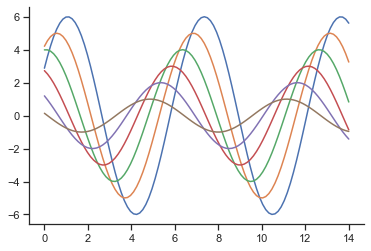

In [9]:
sinplot()
sns.despine()

有些图的好处在于，可以让坐标的主轴随着数据进行偏移，这可以使用 [`despine()`](../generated/seaborn.despine.html#seaborn.despine "seaborn.despine")函数来完成。当刻度无法覆盖轴的整个范围时，`trim`参数将限制不受影响的坐标轴的范围。

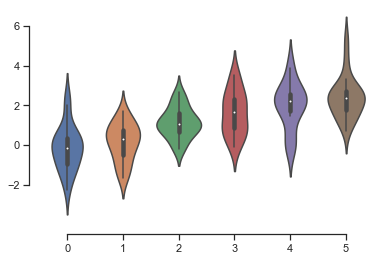

In [10]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

你也可以通过控制 [`despine()`](../generated/seaborn.despine.html#seaborn.despine "seaborn.despine")的额外参数来删除坐标轴：

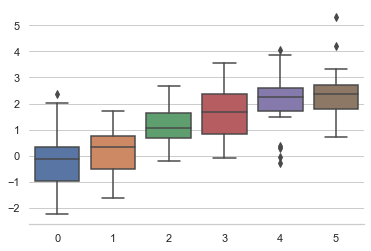

In [11]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

## 设置临时图像格式

虽然来回切换很容易，但你也可以在`with`语句中使用 [`axes_style()`](../generated/seaborn.axes_style.html#seaborn.axes_style "seaborn.axes_style") 函数来临时设置绘图参数。 这也允许您使用不同风格的坐标轴制作图形：

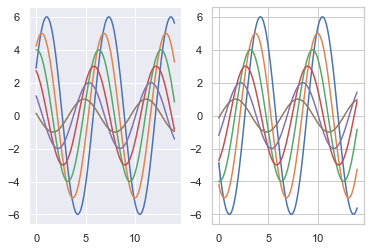

In [12]:
f = plt.figure()
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

## 覆盖控制 seaborn 样式的元素

如果你想要自己定制 seaborn 的样式，你可以通过给 [`axes_style()`](../generated/seaborn.axes_style.html#seaborn.axes_style "seaborn.axes_style") 与[`set_style()`](../generated/seaborn.set_style.html#seaborn.set_style "seaborn.set_style")函数中的 `rc` 参数传递一个参数字典来实现。请注意，您只能通过此方法覆盖作为样式定义一部分的参数。（但是，更高级别的 [`set()`](../generated/seaborn.set.html#seaborn.set "seaborn.set") 函数会获取任何 matplotlib 参数的字典）。

如果你想看看包含哪些参数，你可以只调用没有参数的函数，这将返回当前设置：

```py
sns.axes_style()

```

In [13]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

然后，您可以设置这些参数的不同版本：

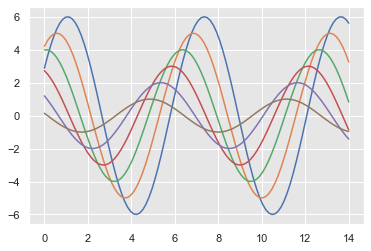

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

## 缩放图像元素

一组独立的参数控制绘图元素的比例，这允许您使用相同的代码来制作在适合使用不同大小图片场景下的图片。

首先，让我们通过调用 [`set()`](../generated/seaborn.set.html#seaborn.set "seaborn.set")来重置默认的参数：

In [15]:
sns.set()

按照相对大小的顺序排序，四个预设环境是 `paper`， `notebook`， `talk`与 `poster`。 `notebook`样式是默认样式，上文中的图就是使用该样式绘制的。

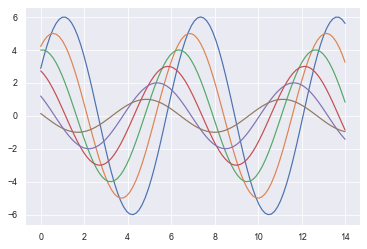

In [16]:
sns.set_context("paper")
sinplot()

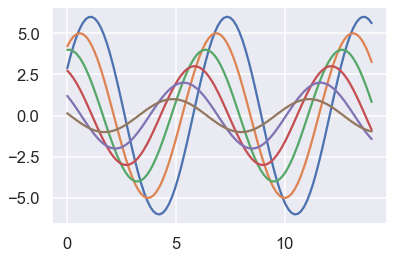

In [17]:
sns.set_context("talk")
sinplot()

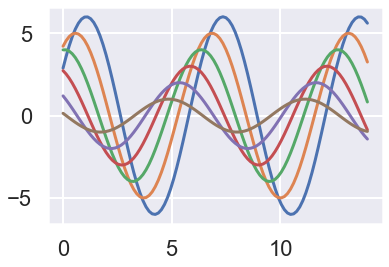

In [18]:
sns.set_context("poster")
sinplot()

您现在知道的关于样式函数的大部分内容应该转移到环境函数中。

你可以通过在调用 [`set_context()`](../generated/seaborn.set_context.html#seaborn.set_context "seaborn.set_context") 时指定环境的名字来设置参数，你也可以通过提供一个参数字典来覆盖原有的参数值。

你也在转换环境的时候独立地对字符元素的大小进行缩放。（这个操作也能够顶层的 [`set()`](../generated/seaborn.set.html#seaborn.set "seaborn.set") 函数来实现）。

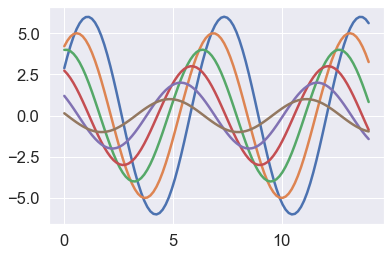

In [19]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

同样的，你也可以暂时的通过嵌套在 `with` 语句下的语句来实现图像的缩放。

样式和环境都可以使用 [`set()`](../generated/seaborn.set.html#seaborn.set "seaborn.set") 函数快速配置。 此函数还设置默认调色板，但更详细的介绍将在本教程的 [下一节](color_palettes.html#palette-tutorial) 进行叙述。